<a href="https://colab.research.google.com/github/AlejandroGC03/RetoMercadotecnia/blob/main/Solucion_Reto_SC_63_AlejandroGarciaCastellanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerías para Análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

# Configuración para mejor visualización
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)



In [ ]:
# Carga de Datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank_marketing_RETO_DS_AS.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


In [ ]:
print("Información del dataset")
df.info()

# Estadísticas para variables numéricas
print("\nEstadísticas Descriptivas (Numéricas):")
df.describe()


Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB

Estadísticas Descriptivas (Numéricas):


,age,balance,day,duration,campaign,pdays,previous
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.090556,1482.262778,15.619556,353.832778,2.520111,50.511333,0.788889
std,11.664253,3031.013197,8.345305,336.945158,2.737758,107.691963,2.210273
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,109.000000,8.000000,131.000000,1.000000,-1.000000,0.000000
50%,39.000000,519.000000,15.000000,240.500000,2.000000,-1.000000,0.000000
75%,49.000000,1646.500000,21.000000,462.000000,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,3253.000000,58.000000,850.000000,58.000000


In [ ]:
# Estadísticas para variables categóricas
print("\nEstadísticas Descriptivas (Categóricas):")
df.describe(include='object')


Estadísticas Descriptivas (Categóricas):


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,1999,5124,4486,8865,4564,7820,6438,2361,6783,5213


In [ ]:
# Revisar el balanceo de la variable objetivo 'y'
print("\nDistribución de la Variable Objetivo 'y':")
print(df['y'].value_counts(normalize=False))
print("\nDistribución Porcentual de 'y':")
print(df['y'].value_counts(normalize=True) * 100)


Distribución de la Variable Objetivo 'y':
y
no     5213
yes    3787
Name: count, dtype: int64

Distribución Porcentual de 'y':
y
no     57.922222
yes    42.077778
Name: proportion, dtype: float64


In [ ]:
df_processed = df.copy()
# Mapeo de variables binarias y objetivo
binary_map = {'yes': 1, 'no': 0}

df_processed['y'] = df_processed['y'].map(binary_map)
df_processed['default'] = df_processed['default'].map(binary_map)
df_processed['housing'] = df_processed['housing'].map(binary_map)
df_processed['loan'] = df_processed['loan'].map(binary_map)

# 2. One-Hot Encoding para variables nominales
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True, dtype=int)

df_processed.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,31,0,2666,0,0,10,318,2,97,6,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,29,0,1584,0,0,6,245,1,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,41,0,2152,1,0,17,369,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,50,0,84,1,0,17,18,8,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,40,0,0,0,0,28,496,2,182,11,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


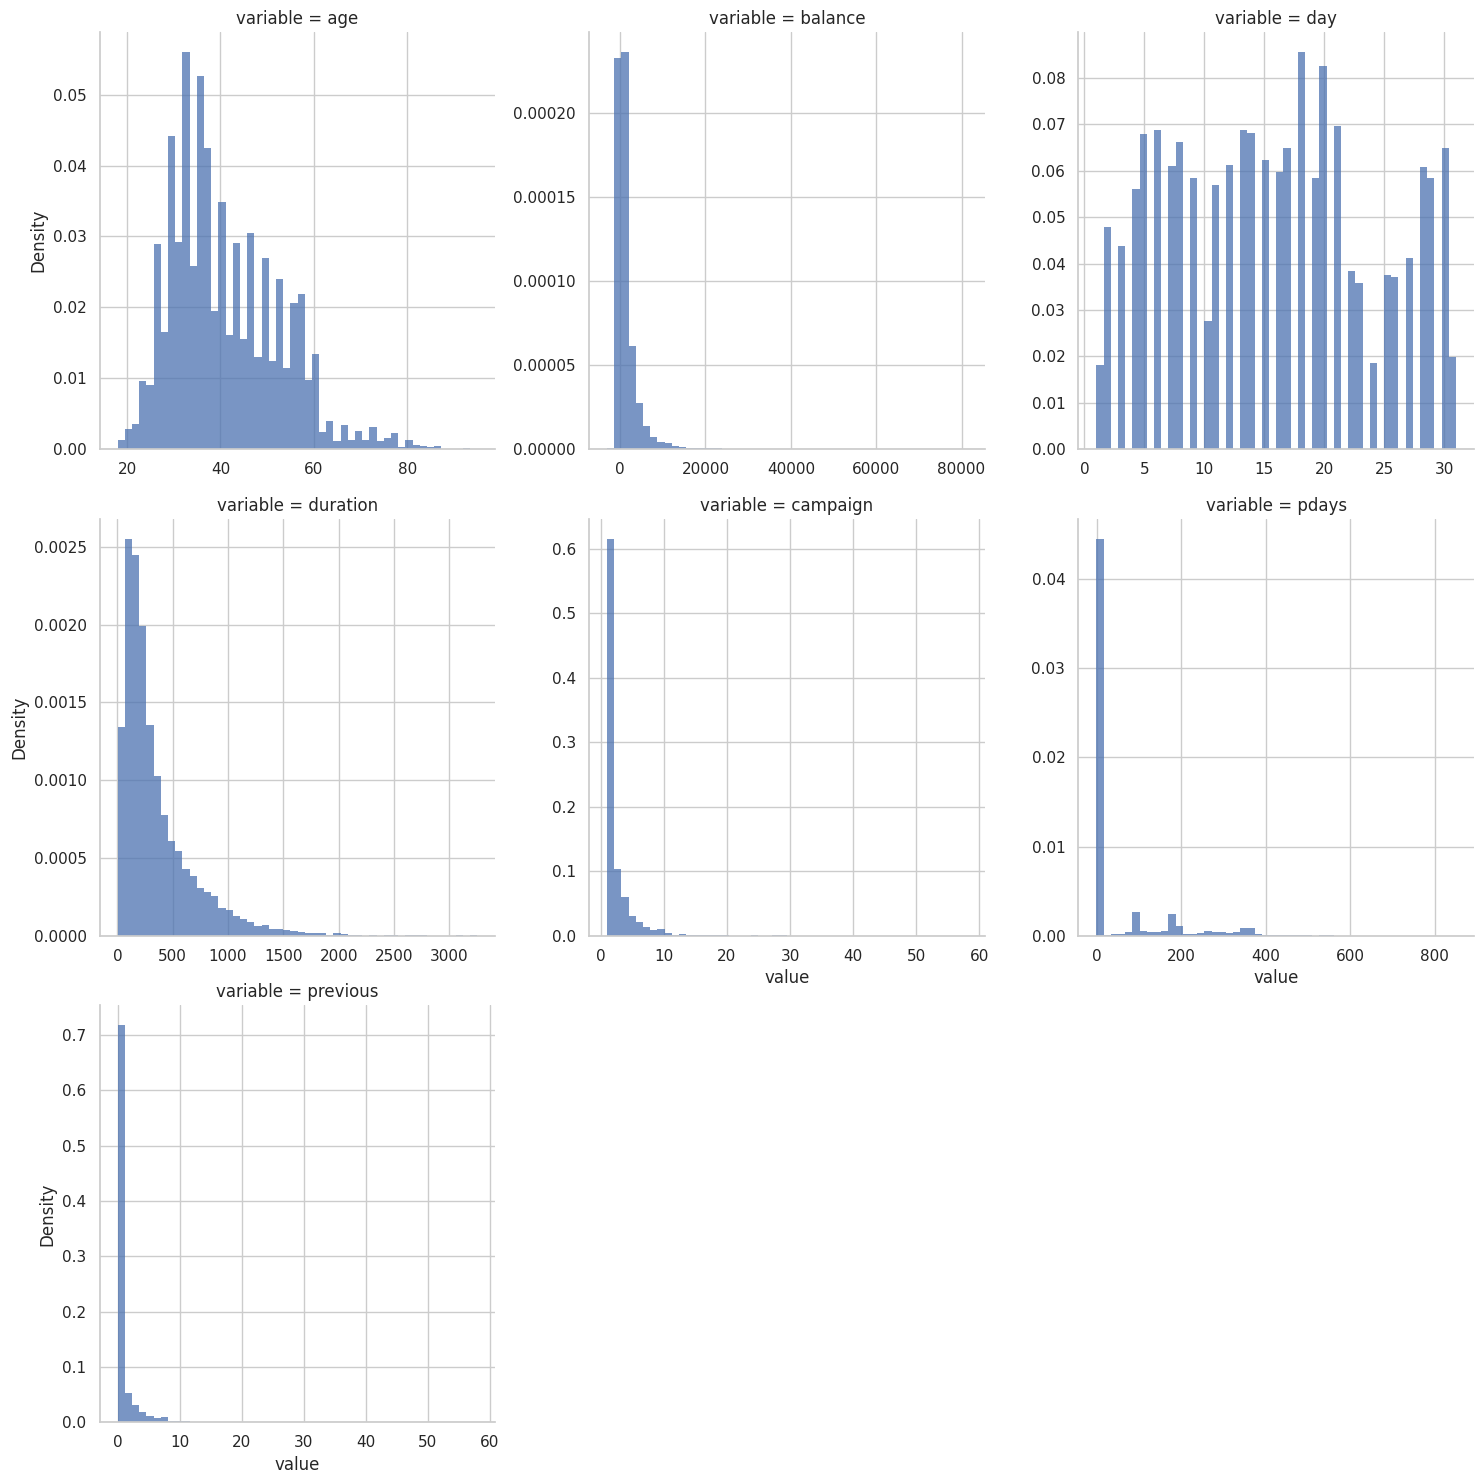

In [ ]:
num_cols = df.select_dtypes(include="number").columns
long = df[num_cols].melt(var_name="variable", value_name="value")

g = sns.displot(
    data=long, x="value", col="variable", col_wrap=3,
    kind="hist", bins=50, stat="density",
    common_norm=False,          # scale each facet independently
    common_bins=False,          # allow different bin edges per facet
    facet_kws=dict(sharex=False, sharey=False)
)

In [ ]:
skewed_cols = ['duration', 'campaign', 'previous']

# Transformamos (log(x+1)) para datos sesgados numericos que son solo positivos
for col in skewed_cols:
    df_processed[col] = np.log1p(df_processed[col])

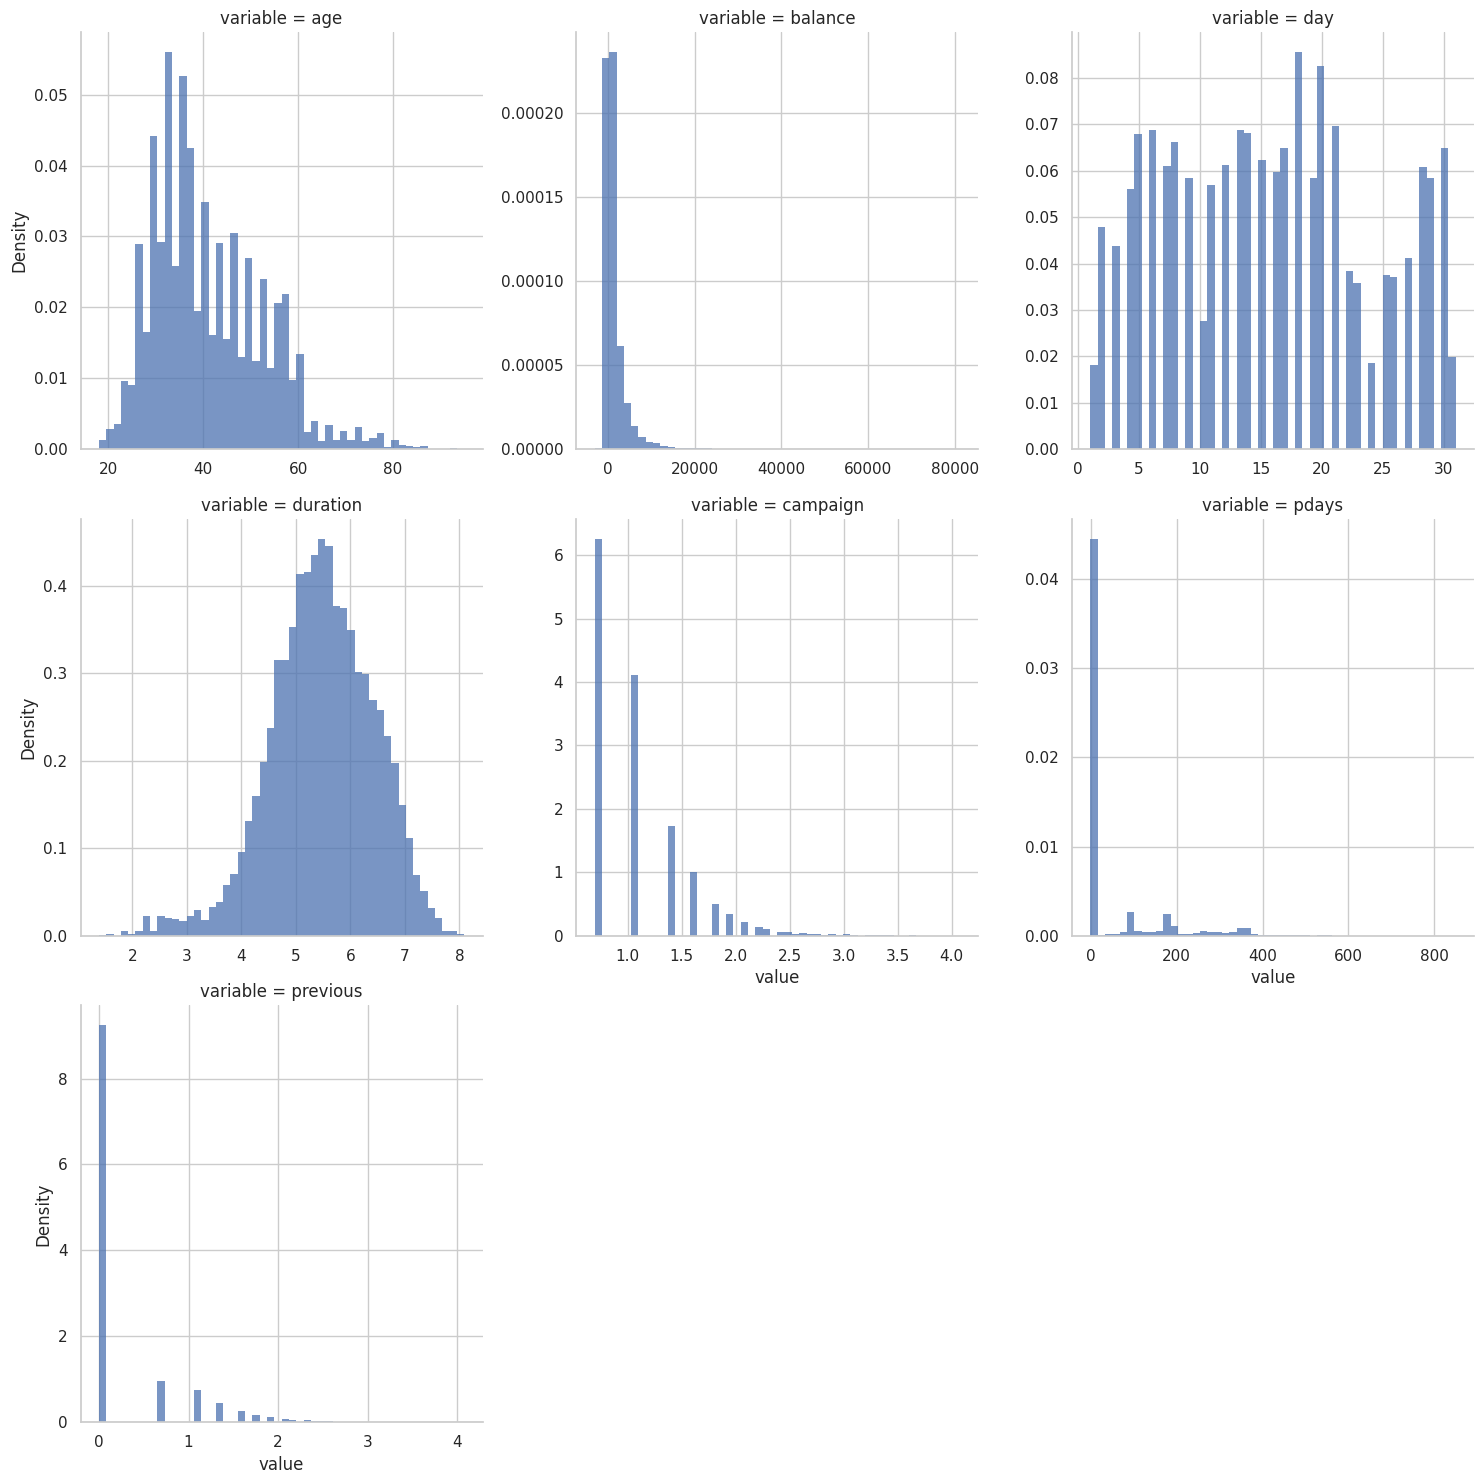

In [ ]:
long = df_processed[num_cols].melt(var_name="variable", value_name="value")

g = sns.displot(
    data=long, x="value", col="variable", col_wrap=3,
    kind="hist", bins=50, stat="density",
    common_norm=False,          # scale each facet independently
    common_bins=False,          # allow different bin edges per facet
    facet_kws=dict(sharex=False, sharey=False)
)

In [ ]:
# Definir 'X' (características) y 'y' (objetivo)
y = df_processed['y']
X = df_processed.drop('y', axis=1)

# Partición 60% train, 20% validation, 20% test
# Separar 20% para test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Separar el 80% restante en 60% train y 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.25,
    random_state=42,
    stratify=y_train_val
)

print("--- Formas de los Conjuntos de Datos ---")
print(f"Forma de X_train (60%): {X_train.shape}")
print(f"Forma de X_val   (20%): {X_val.shape}")
print(f"Forma de X_test  (20%): {X_test.shape}")

--- Formas de los Conjuntos de Datos ---
Forma de X_train (60%): (5400, 42)
Forma de X_val   (20%): (1800, 42)
Forma de X_test  (20%): (1800, 42)


In [ ]:
# Escalado (Post-Split)
# Lista de todas las columnas numéricas
numeric_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar escalador con en el conjunto de entrenamiento
scaler.fit(X_train[numeric_features])

# Transformar todos los conjuntos (train, val, test)
X_train[numeric_features] = scaler.transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

X_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
896,-0.785968,1,-0.518719,1,0,-1.157961,-0.644739,0.575350,-0.476643,-0.510957,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7662,-0.785968,0,-0.216473,0,1,0.882127,2.293799,1.744698,-0.476643,-0.510957,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2160,0.505536,0,-0.457643,0,1,0.762122,-0.486003,2.269833,-0.476643,-0.510957,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3197,0.591636,0,-0.323590,1,0,-0.557935,-0.188093,-0.873019,2.573289,2.437100,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3285,-0.355467,0,-0.434779,1,0,-1.157961,0.662059,-0.873019,1.939052,1.296636,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


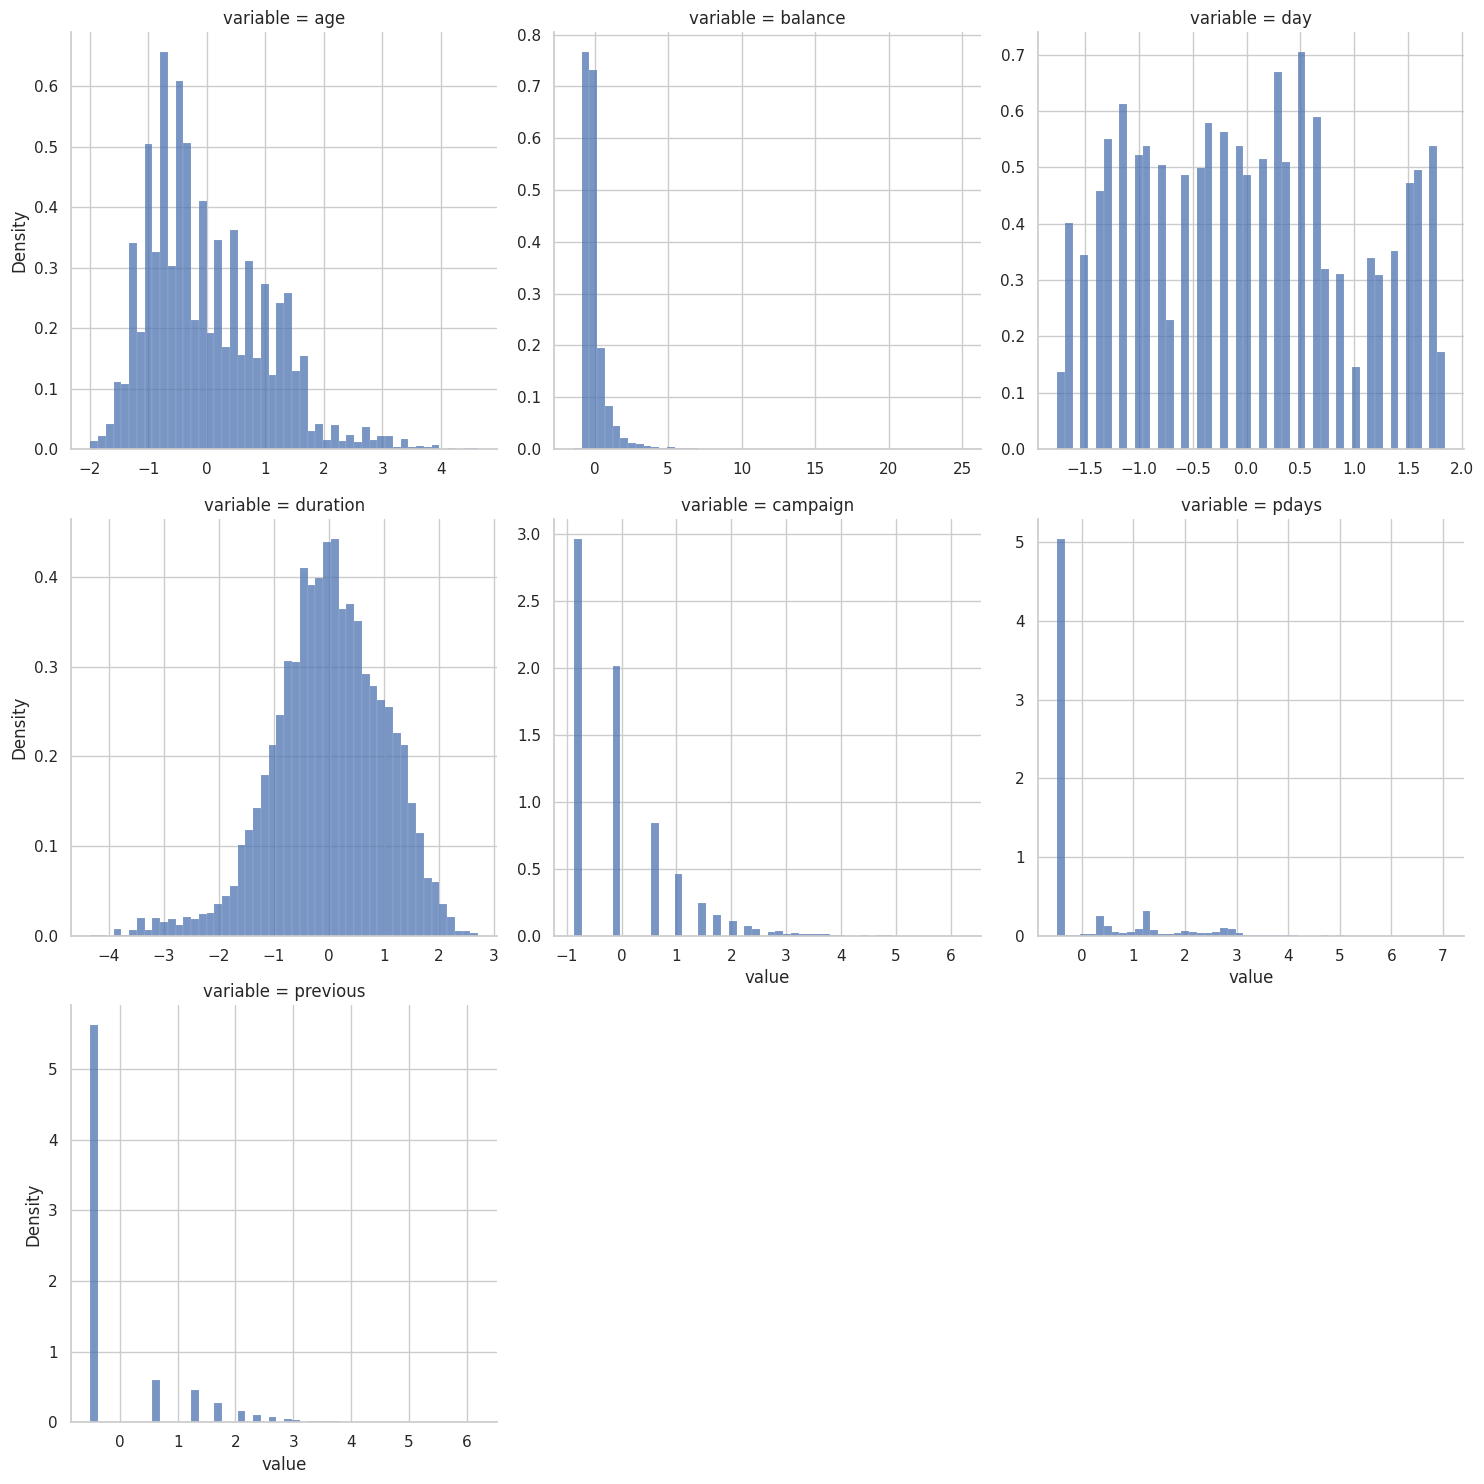

In [ ]:
long = X_train[num_cols].melt(var_name="variable", value_name="value")

g = sns.displot(
    data=long, x="value", col="variable", col_wrap=3,
    kind="hist", bins=50, stat="density",
    common_norm=False,          # scale each facet independently
    common_bins=False,          # allow different bin edges per facet
    facet_kws=dict(sharex=False, sharey=False)
)

In [ ]:
print("--- Ajustando Modelo 1: Regresión Logística ---")

# Parámetros a probar
C_values = [0.01, 0.1, 1, 10]

best_f1_logreg = 0
best_c = None
best_log_model = None

for c in C_values:
    print(f"Probando Regresión Logística con C={c}...")
    model = LogisticRegression(
        C=c,
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    )
    model.fit(X_train, y_train)

    #Predecir en el set de validación
    y_val_pred = model.predict(X_val)

    # Calcular F1-Score para la clase 'Yes'
    f1 = f1_score(y_val, y_val_pred, pos_label=1)
    print(f"  -> F1-Score (Yes) en Validación: {f1:.4f}")

    # Guardar mejor hasta ahora
    if f1 > best_f1_logreg:
        best_f1_logreg = f1
        best_c = c
        best_log_model = model

print("\n--- Resultado Ajuste Regresión Logística ---")
print(f"Mejor C: {best_c}")
print(f"Mejor F1-Score (Yes) en Validación: {best_f1_logreg:.4f}")

--- Ajustando Modelo 1: Regresión Logística ---
Probando Regresión Logística con C=0.01...
  -> F1-Score (Yes) en Validación: 0.7930
Probando Regresión Logística con C=0.1...
  -> F1-Score (Yes) en Validación: 0.8010
Probando Regresión Logística con C=1...
  -> F1-Score (Yes) en Validación: 0.7977
Probando Regresión Logística con C=10...
  -> F1-Score (Yes) en Validación: 0.7927

--- Resultado Ajuste Regresión Logística ---
Mejor C: 0.1
Mejor F1-Score (Yes) en Validación: 0.8010



Reporte de Clasificación (Validación):
              precision    recall  f1-score   support

      No (0)       0.87      0.81      0.84      1042
     Yes (1)       0.77      0.84      0.80       758

    accuracy                           0.82      1800
   macro avg       0.82      0.83      0.82      1800
weighted avg       0.83      0.82      0.83      1800

Matriz de Confusión (Validación):


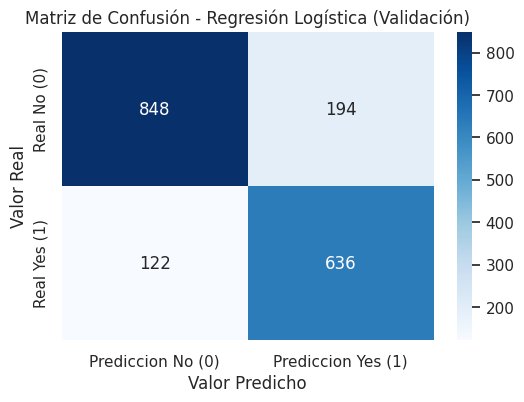

In [ ]:
y_val_pred = best_log_model.predict(X_val)
print("\nReporte de Clasificación (Validación):")
report = classification_report(y_val, y_val_pred, target_names=['No (0)', 'Yes (1)'])
print(report)

# Generar la Matriz de Confusión
print("Matriz de Confusión (Validación):")
cm = confusion_matrix(y_val, y_val_pred)

# Visualizar la Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prediccion No (0)', 'Prediccion Yes (1)'],
            yticklabels=['Real No (0)', 'Real Yes (1)'])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.title('Matriz de Confusión - Regresión Logística (Validación)')
plt.show()

In [ ]:
print("\n--- Ajustando Modelo 2: Red Neuronal ---")

# Arquitecturas a probar
architectures = [
    (50,),           # 1 capa oculta con 50 neuronas
    (50, 25),        # 2 capas ocultas
    (100, 50),       # 2 capas ocultas más grandes
    (50, 25, 10),    # 3 capas ocultas
    (100, 50, 25)    # 3 capas ocultas mas grandes
]

# Variables para guardar el mejor modelo
best_f1_nn = 0
best_arch = None
best_nn_model = None

for arch in architectures:
    print(f"Probando Red Neuronal con arquitectura={arch}...")

    model_nn = MLPClassifier(
        hidden_layer_sizes=arch,
        activation='relu',
        alpha=0.001,
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42
    )
    model_nn.fit(X_train, y_train)

    # Predecir en el set de validación
    y_val_pred_nn = model_nn.predict(X_val)

    # Calcular F1-Score para la clase 'Yes
    f1_nn = f1_score(y_val, y_val_pred_nn, pos_label=1)
    print(f"  -> F1-Score (Yes) en Validación: {f1_nn:.4f}")

    # Guardar si es el mejor hasta ahora
    if f1_nn > best_f1_nn:
        best_f1_nn = f1_nn
        best_arch = arch
        best_nn_model = model_nn

print("\n--- Resultado Ajuste Red Neuronal ---")
print(f"Mejor Arquitectura: {best_arch}")
print(f"Mejor F1-Score (Yes) en Validación: {best_f1_nn:.4f}")


--- Ajustando Modelo 2: Red Neuronal ---
Probando Red Neuronal con arquitectura=(50,)...
  -> F1-Score (Yes) en Validación: 0.8160
Probando Red Neuronal con arquitectura=(50, 25)...
  -> F1-Score (Yes) en Validación: 0.7992
Probando Red Neuronal con arquitectura=(100, 50)...
  -> F1-Score (Yes) en Validación: 0.8143
Probando Red Neuronal con arquitectura=(50, 25, 10)...
  -> F1-Score (Yes) en Validación: 0.8171
Probando Red Neuronal con arquitectura=(100, 50, 25)...
  -> F1-Score (Yes) en Validación: 0.8138

--- Resultado Ajuste Red Neuronal ---
Mejor Arquitectura: (50, 25, 10)
Mejor F1-Score (Yes) en Validación: 0.8171



Reporte de Clasificación (Red Neuronal):
              precision    recall  f1-score   support

      No (0)       0.88      0.84      0.86      1042
     Yes (1)       0.79      0.84      0.82       758

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800

Matriz de Confusión (Red Neuronal):


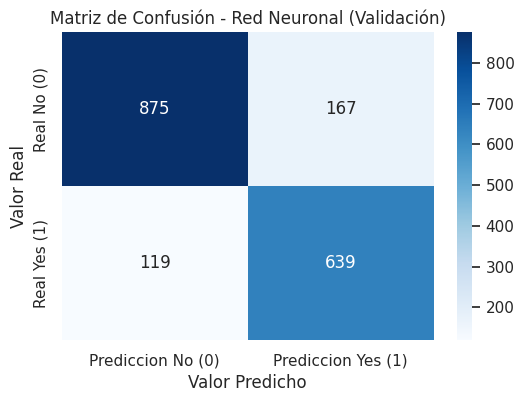

In [ ]:
y_val_pred_nn = best_nn_model.predict(X_val)
# Generar el Reporte de Clasificación
print("\nReporte de Clasificación (Red Neuronal):")
report_nn = classification_report(y_val, y_val_pred_nn, target_names=['No (0)', 'Yes (1)'])
print(report_nn)

# Generar la Matriz de Confusión
print("Matriz de Confusión (Red Neuronal):")
cm_nn = confusion_matrix(y_val, y_val_pred_nn)

# Visualizar la Matriz de Confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prediccion No (0)', 'Prediccion Yes (1)'],
            yticklabels=['Real No (0)', 'Real Yes (1)'])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.title('Matriz de Confusión - Red Neuronal (Validación)')
plt.show()

--- Gráfica de Aprendizaje: Red Neuronal (MLPClassifier) ---


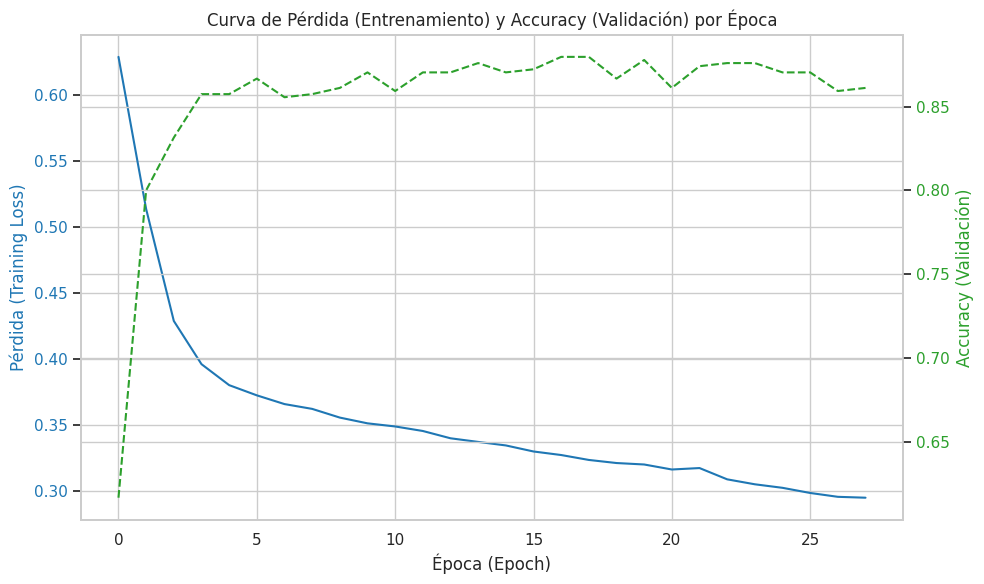

In [ ]:
print("--- Gráfica de Aprendizaje: Red Neuronal (MLPClassifier) ---")


fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje 1: Pérdida (Loss) de Entrenamiento
color = 'tab:blue'
ax1.set_xlabel('Época (Epoch)')
ax1.set_ylabel('Pérdida (Training Loss)', color=color)
ax1.plot(best_nn_model.loss_curve_, color=color, label='Pérdida de Entrenamiento')
ax1.tick_params(axis='y', labelcolor=color)

# Eje 2: Accuracy de Validación
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Accuracy (Validación)', color=color)
ax2.plot(best_nn_model.validation_scores_, color=color, label='Accuracy de Validación', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Curva de Pérdida (Entrenamiento) y Accuracy (Validación) por Época')
fig.tight_layout()
plt.show()

--- Evaluación Final mejor modelo (Red Neuronal) ---
--- Usando el Conjunto de PRUEBA (Test Set) ---

Reporte de Clasificación (Prueba):
              precision    recall  f1-score   support

      No (0)       0.87      0.82      0.84      1043
     Yes (1)       0.77      0.82      0.80       757

    accuracy                           0.82      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.83      0.82      0.82      1800

Matriz de Confusión (Prueba):


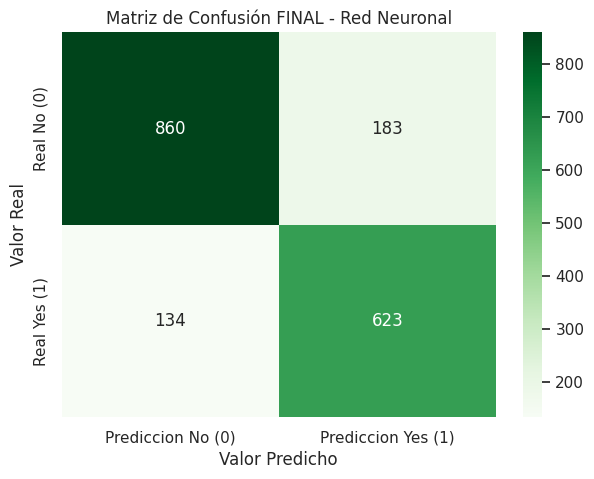

In [ ]:
#Evaluación Final del Modelo
print("--- Evaluación Final mejor modelo (Red Neuronal) ---")
print(f"--- Usando el Conjunto de PRUEBA (Test Set) ---")

# Realizar predicciones en el conjunto de prueba
y_test_pred = best_nn_model.predict(X_test)

#Generar el Reporte de Clasificación Final
print("\nReporte de Clasificación (Prueba):")
report_test = classification_report(y_test, y_test_pred, target_names=['No (0)', 'Yes (1)'])
print(report_test)

# Generar la Matriz de Confusión Final
print("Matriz de Confusión (Prueba):")
cm_test = confusion_matrix(y_test, y_test_pred)

# Visualizar la Matriz de Confusión Final
plt.figure(figsize=(7, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Prediccion No (0)', 'Prediccion Yes (1)'],
            yticklabels=['Real No (0)', 'Real Yes (1)'])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.title('Matriz de Confusión FINAL - Red Neuronal')
plt.show()